# Astera Paper

This notebook generates (some of) the plots for our Astera paper, see https://arxiv.org/abs/2010.02942

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy import interpolate
import pandas as pd

In [2]:
# Read in data
path = "~/Data/SDSS/Catalog_SDSS_complete.dat"
df = pd.read_csv(path, sep=' ')

flag_nonzero_rad = 10**np.array(df["logReSerExp"]) > 0
flag_central = df["NewLCentSat"] == 1. # Only centrals
flag_hasMass = np.array(df['MsCent']) != -999. # Only valid stellar masses

flag_central = flag_central & flag_nonzero_rad & flag_hasMass

# Remove bad galaxies
TType = np.array(df['TType'])[flag_central]
StellarMass = np.array(df['MsCent'])[flag_central]
VMax = np.array(df["Vmaxwt"])[flag_central]
Re = 10**np.array(df["logReSerExp"])[flag_central] # kpc

In [3]:
# Bins of (log) stellar mass
bins = np.arange(8, 13, 0.05)

# Bin for actual mean
array, edges, numbers = stats.binned_statistic(StellarMass, VMax*TType, statistic='sum', bins = bins)
den = stats.binned_statistic(StellarMass, VMax, statistic = 'sum', bins = bins)[0]
array = array/den

# For the purposes of the error, we need to do some housekeeping here
means = np.zeros(len(numbers)) # Storage array for the means - the value of the mean at each element
for i in range(len(means)):
    means[i] = array[numbers[i]-1] # The mean value for the bin at which each element belongs
residuals = TType - means

# Positive Error
positive_mask = residuals > 0
std_positive = stats.binned_statistic(StellarMass[positive_mask], 
                                      VMax[positive_mask]*(residuals[positive_mask])**2,
                                      statistic = 'sum', bins = bins)[0]
binCounts = stats.binned_statistic(StellarMass[positive_mask], 
                                   means[positive_mask], 
                                   statistic = 'count', bins = bins)[0]
den2 = (((binCounts-1)/binCounts)*den)
dev_pos = np.sqrt(std_positive/den2)

# Negative Error
negative_mask = residuals < 0
std_positive = stats.binned_statistic(StellarMass[negative_mask], 
                                      VMax[negative_mask]*(residuals[negative_mask])**2,
                                      statistic = 'sum', bins = bins)[0]
binCounts = stats.binned_statistic(StellarMass[negative_mask],
                                   means[negative_mask], statistic = 'count', bins = bins)[0]

den2 = (((binCounts-1)/binCounts)*den)
dev_neg = np.sqrt(std_positive/den2)


/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.p

In [4]:
array2, edges2, numbers2 = stats.binned_statistic(StellarMass, VMax*Re, statistic='sum', bins = bins)
den = stats.binned_statistic(StellarMass, VMax, statistic = 'sum', bins = bins)[0]
array2 = array2/den

# For the purposes of the error, we need to do some housekeeping here
means = np.zeros(len(numbers2)) # Storage array for the means - the value of the mean at each element
for i in range(len(means)):
    means[i] = array2[numbers2[i]-1] # There probably is a faster way to do this
residuals = Re-means
    
# POSITIVE Error

positive_mask = residuals > 0
std_positive = stats.binned_statistic(StellarMass[positive_mask], 
                                      VMax[positive_mask]*(residuals[positive_mask])**2,
                                      statistic = 'sum', bins = bins)[0]
binCounts = stats.binned_statistic(StellarMass[positive_mask], 
                                   means[positive_mask], 
                                   statistic = 'count', bins = bins)[0]
den2 = (((binCounts-1)/binCounts)*den)
dev2_pos = np.sqrt(std_positive/den2)

# NEGATIVE Error

negative_mask = residuals < 0
std_positive = stats.binned_statistic(StellarMass[negative_mask], 
                                      VMax[negative_mask]*(residuals[negative_mask])**2,
                                      statistic = 'sum', bins = bins)[0]
binCounts = stats.binned_statistic(StellarMass[negative_mask],
                                   means[negative_mask], statistic = 'count', bins = bins)[0]
den2 = (((binCounts-1)/binCounts)*den)
dev2_neg = np.sqrt(std_positive/den2)




/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in t

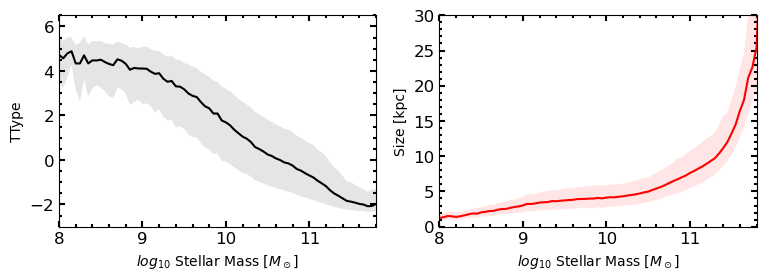

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 2.8), dpi = 100)

#plt.figure(dpi=400)
axes[0].plot(bins[:-1], array, 'k')
axes[0].fill_between(bins[:-1], array+dev_pos, array-dev_neg, facecolor='black', alpha=0.1)

#plt.fill_between(bins[:-1], np.ones_like(bins[:-1])*7, np.zeros_like(bins[:-1]), alpha=0.05, color = 'k')

axes[0].axis(xmin=8,xmax=11.8, ymin=-3, ymax=6.5)
#axes[0].ylim([-3, 6.5])

axes[0].set_xlabel("$log_{10}$ Stellar Mass [$M_\odot$]")
axes[0].set_ylabel("TType")

axes[0].tick_params(which='major', right=True, top=True, direction='in', length=4, width=1.5, labelsize = 12)
axes[0].tick_params(which='minor', right=True, top=True, direction='in', length=2, width=1.5)
axes[0].minorticks_on()


axes[1].plot(bins[:-1], array2, 'r')
axes[1].axis(xmin=8,xmax=11.8, ymin=0, ymax=30)
axes[1].fill_between(bins[:-1], array2+dev2_pos, array2-dev2_neg, facecolor='red', alpha=0.1)
#axes[1].plot(StellarMass, Re, '.', alpha=0.004)

axes[1].tick_params(which='major', right=True, top=True, direction='in', length=4, width=1.5, labelsize = 12)
axes[1].tick_params(which='minor', right=True, top=True, direction='in', length=2, width=1.5)
axes[1].minorticks_on()

axes[1].set_xlabel("$log_{10}$ Stellar Mass [$M_\odot$]")
axes[1].set_ylabel("Size [kpc]")

plt.subplots_adjust(wspace = 0.2)
plt.show()
fig.tight_layout()
fig.savefig("/Users/chris/Desktop/SDSStrends.png", dpi = 400)


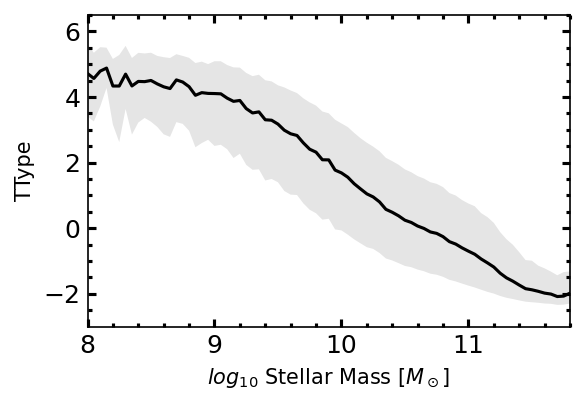

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 2.8), dpi = 150)

#plt.figure(dpi=400)
axes.plot(bins[:-1], array, 'k')
axes.fill_between(bins[:-1], array+dev_pos, array-dev_neg, facecolor='black', alpha=0.1)

#plt.fill_between(bins[:-1], np.ones_like(bins[:-1])*7, np.zeros_like(bins[:-1]), alpha=0.05, color = 'k')

axes.axis(xmin=8,xmax=11.8, ymin=-3, ymax=6.5)
#axes[0].ylim([-3, 6.5])
axes.set_xlabel("$log_{10}$ Stellar Mass [$M_\odot$]")
axes.set_ylabel("TType")

axes.tick_params(which='major', right=True, top=True, direction='in', length=4, width=1.5, labelsize = 12)
axes.tick_params(which='minor', right=True, top=True, direction='in', length=2, width=1.5)
axes.minorticks_on()

fig.tight_layout()

plt.show()

fig.savefig("/Users/chris/Desktop/SDSSTType.png", dpi = 150)

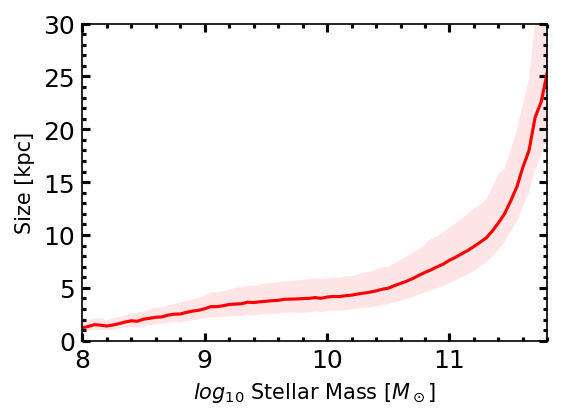

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 2.8), dpi = 150)

axes.plot(bins[:-1], array2, 'r')
axes.axis(xmin=8,xmax=11.8, ymin=0, ymax=30)
axes.fill_between(bins[:-1], array2+dev2_pos, array2-dev2_neg, facecolor='red', alpha=0.1)

axes.tick_params(which='major', right=True, top=True, direction='in', length=4, width=1.5, labelsize = 12)
axes.tick_params(which='minor', right=True, top=True, direction='in', length=2, width=1.5)
axes.minorticks_on()

axes.set_xlabel("$log_{10}$ Stellar Mass [$M_\odot$]")
axes.set_ylabel("Size [kpc]")

plt.subplots_adjust(wspace = 0.2)

plt.show()

fig.tight_layout()

fig.savefig("/Users/chris/Desktop/SDSSsize.png", dpi = 150)

In [ ]:
# Bin by sm
bins = np.arange(0., 30.0, 0.05)

# Weighted average by VMax
array, edges, numbers = stats.binned_statistic(StellarMass, VMax*TType, statistic='sum', bins = bins)
den = stats.binned_statistic(StellarMass, VMax, statistic = 'sum', bins = bins)[0]

array[array != 0] = array[array != 0]/den[array != 0] # Calculate the numerator and denominator separately, to make the best use of binned statistic

# For the purposes of the error, we need to do some housekeeping here
means = np.zeros(len(numbers)) # Storage array for the means - the value of the mean at each element
for i in range(len(means)):
    means[i] = array[numbers[i]-1] # There probably is a faster way to do this
# Calculate the components needed for the standard deviation
std_wrong = stats.binned_statistic(StellarMass, VMax*(TType - means)**2, statistic = 'sum', bins = bins)[0]
binCounts = stats.binned_statistic(StellarMass, means, statistic = 'count', bins = bins)[0]

# Calculate the standard deviation
nonzero = binCounts != 0

den = (((binCounts[nonzero]-1)/binCounts[nonzero])*den[nonzero])
valid_den = den != 0
dev = np.sqrt(std_wrong[nonzero][valid_den]/den[valid_den])

get_ttype = interpolate.interp1d(bins[0:-1][array != 0], array[array != 0],
                                bounds_error=False, fill_value="extrapolate")
get_ttype_Error = interpolate.interp1d(bins[0:-1][nonzero][valid_den], dev,
                                     bounds_error=False, fill_value="extrapolate")

In [ ]:
plt.figure()
sm = np.arange(9, 14, 0.1)
plt.plot(sm, get_ttype(sm), 'x')
plt.show()